# **Tugas 10 - Implementasi Reduksi Dimensi SVD dan Fuzzy C-Means untuk Clustering Data**

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/taawdyy/ppw

Link Streamlit : https://huggingface.co/spaces/Nityaaa/Clasf_SVD

## Install Library

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.7 MB/s eta 0:00:00


## Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

- numpy: Digunakan untuk operasi matematis dan manipulasi array multidimensi.
- pandas: Digunakan untuk manipulasi dan analisis data berbentuk tabel (DataFrame).
- TruncatedSVD: Untuk mengurangi dimensi data (dimensionality reduction).
- cmeans: Algoritma clustering fuzzy c-means untuk pengelompokan data dengan keanggotaan fuzzy.
- LabelEncoder: Untuk mengonversi label kategori menjadi angka.
- accuracy_score: Untuk mengukur akurasi model klasifikasi.
- matplotlib.pyplot: Untuk membuat grafik dan visualisasi data.

## Load Data

In [ ]:
file_path = "berita_vsm.csv"
data = pd.read_csv(file_path)

data

,Kategori,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,Ekonomi,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


## Memisahkan Label dan Fitur

In [ ]:
labels = data['Kategori']
features = data.drop('Kategori', axis=1).values

## Mengubah Label menjadi Numerik Menggunakan Label Encoding

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

## Menampilkan Data Sebelum Reduksi Dimensi

In [ ]:
data_before_reduction = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(features.shape[1])])
print("Data Sebelum Reduksi Dimensi:")
data_before_reduction

Data Sebelum Reduksi Dimensi:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_1873,Feature_1874,Feature_1875,Feature_1876,Feature_1877,Feature_1878,Feature_1879,Feature_1880,Feature_1881,Feature_1882
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


## Clustering dengan SVD dan Fuzzy C-Means
SVD adalah metode matematis yang digunakan untuk dekomposisi matriks. Dalam konteks pemrosesan data, SVD memecah matriks menjadi tiga matriks yang lebih sederhana. Tujuan utamanya adalah untuk mengurangi dimensi data dan menemukan pola tersembunyi dalam data. Fuzzy C-Means (FCM) adalah metode clustering yang memperbolehkan sebuah data menjadi anggota lebih dari satu cluster dengan derajat keanggotaan tertentu (bukan hanya keanggotaan keras seperti pada K-Means).
- 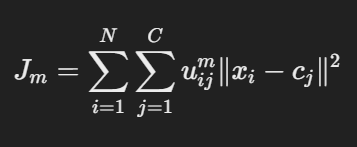
- 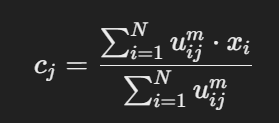
- 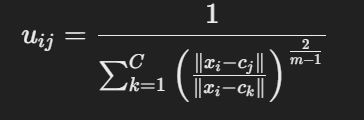

In [ ]:
results = {}

for dim in range(features.shape[1], 99, -1):
    # Kurangi dimensi data
    svd = TruncatedSVD(n_components=dim)
    reduced_features = svd.fit_transform(features)

    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data=reduced_features.T,
        c=2,                  # 2 clusters
        m=2.0,                # Tingkat fuzziness
        error=0.005,          # Toleransi error
        maxiter=1000          # Iterasi maksimum
    )

    # Keanggotaan cluster
    cluster_membership = np.argmax(u, axis=0)

    # Hitung akurasi berdasarkan label asli
    accuracy = max(
        accuracy_score(encoded_labels, cluster_membership),
        accuracy_score(encoded_labels, 1 - cluster_membership)  # Cek inversi cluster
    )

    # Simpan hasil
    results[dim] = {
        'svd_features': reduced_features,
        'centroids': cntr,
        'membership': cluster_membership,
        'accuracy': accuracy
    }

## Menampilkan Data Setelah Reduksi Dimensi

In [ ]:
# Tampilkan data setelah reduksi dimensi terakhir (100 dimensi)
final_result = results[100]  # Dimensi terakhir adalah 100
svd_features = final_result['svd_features']
data_after_reduction = pd.DataFrame(svd_features, columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])
print("Data Setelah Reduksi Dimensi (100 dimensi):")
data_after_reduction

Data Setelah Reduksi Dimensi (100 dimensi):


,SVD_Component_1,SVD_Component_2,SVD_Component_3,SVD_Component_4,SVD_Component_5,SVD_Component_6,SVD_Component_7,SVD_Component_8,SVD_Component_9,SVD_Component_10,...,SVD_Component_91,SVD_Component_92,SVD_Component_93,SVD_Component_94,SVD_Component_95,SVD_Component_96,SVD_Component_97,SVD_Component_98,SVD_Component_99,SVD_Component_100
0,0.093099,0.573190,-0.028131,-0.032969,-0.024234,-0.005466,-0.015603,0.015454,0.016430,0.101453,...,-2.081668e-17,2.146720e-17,3.469447e-18,-3.469447e-18,1.387779e-17,6.938894e-18,4.336809e-18,6.938894e-18,-1.734723e-17,9.540979e-18
1,0.090604,0.158615,0.104817,0.148574,-0.275716,-0.140610,0.193041,-0.231671,0.501848,-0.392639,...,7.372575e-18,-2.341877e-17,1.582935e-17,-9.107298e-18,6.938894e-18,1.474515e-17,-3.903128e-18,1.734723e-18,-1.214306e-17,-3.339343e-17
2,0.057158,0.049912,0.240841,0.589983,0.397516,-0.079104,-0.098630,0.178133,-0.023735,0.003473,...,-3.469447e-18,8.673617e-19,4.323256e-18,1.734723e-18,-3.903128e-18,1.734723e-18,8.673617e-19,2.602085e-18,-3.469447e-18,-2.393918e-16
3,0.101120,0.073450,0.210502,0.618311,0.396414,-0.054688,-0.059791,0.068419,-0.070486,-0.033841,...,5.637851e-18,1.734723e-18,-9.540979e-18,1.561251e-17,-4.770490e-18,6.071532e-18,1.040834e-17,3.035766e-18,-6.938894e-18,2.903493e-16
4,0.608507,-0.026830,-0.016671,-0.063431,-0.076160,0.027800,0.005602,0.357663,0.207046,0.208267,...,5.854692e-18,-1.105886e-17,3.469447e-17,1.734723e-18,1.387779e-17,-9.540979e-18,2.070826e-17,-3.274291e-17,-3.469447e-18,1.908196e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.256643,-0.031673,0.515958,-0.328950,0.190952,0.057864,-0.145323,-0.154503,0.187062,-0.085783,...,2.168404e-17,-8.023096e-18,-2.168404e-17,1.734723e-18,5.204170e-18,5.204170e-18,-5.637851e-18,-4.187731e-18,2.602085e-18,-4.423545e-17
96,0.118151,0.037285,0.118307,0.078603,-0.227179,-0.254570,-0.436384,-0.240363,0.148380,0.489227,...,-8.239937e-18,3.469447e-18,-1.040834e-17,1.821460e-17,-1.680513e-18,3.469447e-18,-1.620882e-17,-1.084202e-18,-1.604619e-17,8.543513e-17
97,0.156865,-0.014578,0.208097,-0.057019,0.101646,0.006441,-0.051288,-0.291341,-0.046316,0.352859,...,-1.734723e-18,-1.734723e-18,3.469447e-18,4.336809e-19,-8.673617e-19,6.938894e-18,6.938894e-18,-1.734723e-18,6.722053e-18,-1.726050e-16
98,0.630161,-0.092418,-0.234479,0.068787,0.104869,0.184267,0.044836,-0.374761,-0.078158,-0.117636,...,8.673617e-18,-7.155734e-18,-8.673617e-19,-6.938894e-18,-8.239937e-18,6.938894e-18,2.602085e-18,-7.806256e-18,-1.214306e-17,-1.040834e-17


## Scatter Plot untuk Dimensi 2

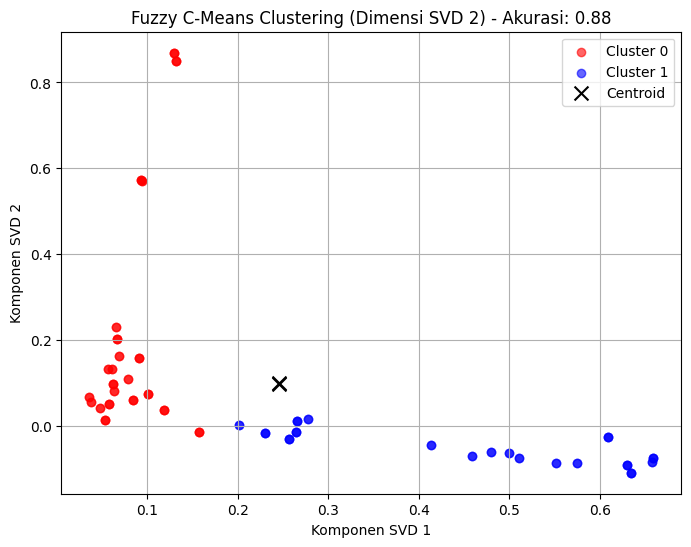

In [ ]:
centroids = final_result['centroids']
membership = final_result['membership']
accuracy = final_result['accuracy']

plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD 2) - Akurasi: {accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()

## Menampilkan Akurasi Setiap Dimensi

In [ ]:
for dim, result in results.items():
    print(f"Dimensi: {dim}, Akurasi: {result['accuracy']:.2f}")

Dimensi: 1882, Akurasi: 0.88
Dimensi: 1881, Akurasi: 0.86
Dimensi: 1880, Akurasi: 0.89
Dimensi: 1879, Akurasi: 0.88
Dimensi: 1878, Akurasi: 0.86
Dimensi: 1877, Akurasi: 0.86
Dimensi: 1876, Akurasi: 0.63
Dimensi: 1875, Akurasi: 0.86
Dimensi: 1874, Akurasi: 0.75
Dimensi: 1873, Akurasi: 0.64
Dimensi: 1872, Akurasi: 0.66
Dimensi: 1871, Akurasi: 0.67
Dimensi: 1870, Akurasi: 0.78
Dimensi: 1869, Akurasi: 0.88
Dimensi: 1868, Akurasi: 0.91
Dimensi: 1867, Akurasi: 0.94
Dimensi: 1866, Akurasi: 0.91
Dimensi: 1865, Akurasi: 0.83
Dimensi: 1864, Akurasi: 0.85
Dimensi: 1863, Akurasi: 0.73
Dimensi: 1862, Akurasi: 0.91
Dimensi: 1861, Akurasi: 0.91
Dimensi: 1860, Akurasi: 0.88
Dimensi: 1859, Akurasi: 0.88
Dimensi: 1858, Akurasi: 0.88
Dimensi: 1857, Akurasi: 0.83
Dimensi: 1856, Akurasi: 0.68
Dimensi: 1855, Akurasi: 0.91
Dimensi: 1854, Akurasi: 0.88
Dimensi: 1853, Akurasi: 0.86
Dimensi: 1852, Akurasi: 0.82
Dimensi: 1851, Akurasi: 0.91
Dimensi: 1850, Akurasi: 0.66
Dimensi: 1849, Akurasi: 0.86
Dimensi: 1848,

## Menampilkan Akurasi Terbaik

In [ ]:
best_dim = max(results, key=lambda dim: results[dim]['accuracy'])
best_accuracy = results[best_dim]['accuracy']

print(f"Akurasi terbaik: {best_accuracy:.2f} pada dimensi {best_dim}.")

Akurasi terbaik: 0.97 pada dimensi 1708.


## Scatter Plot untuk Dimensi Terbaik

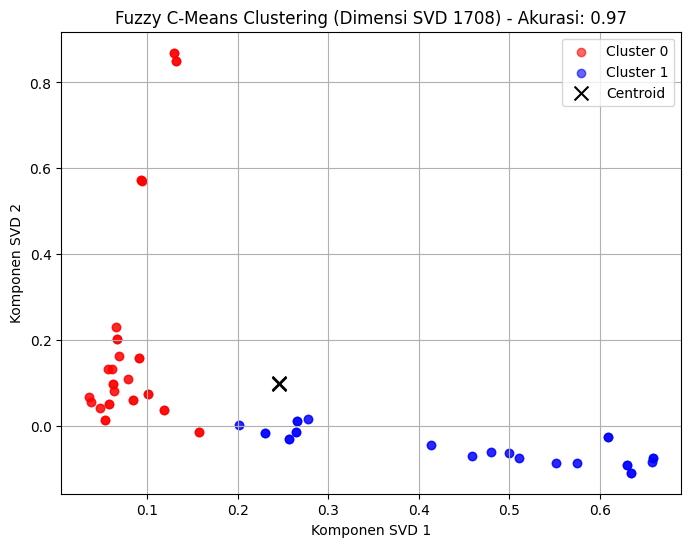

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):  # Untuk 2 cluster
    cluster_points = svd_features[membership == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroid')
plt.title(f"Fuzzy C-Means Clustering (Dimensi SVD {best_dim}) - Akurasi: {best_accuracy:.2f}")
plt.xlabel("Komponen SVD 1")
plt.ylabel("Komponen SVD 2")
plt.legend()
plt.grid()
plt.show()

## Visualisasi Akurasi setiap Dimensi

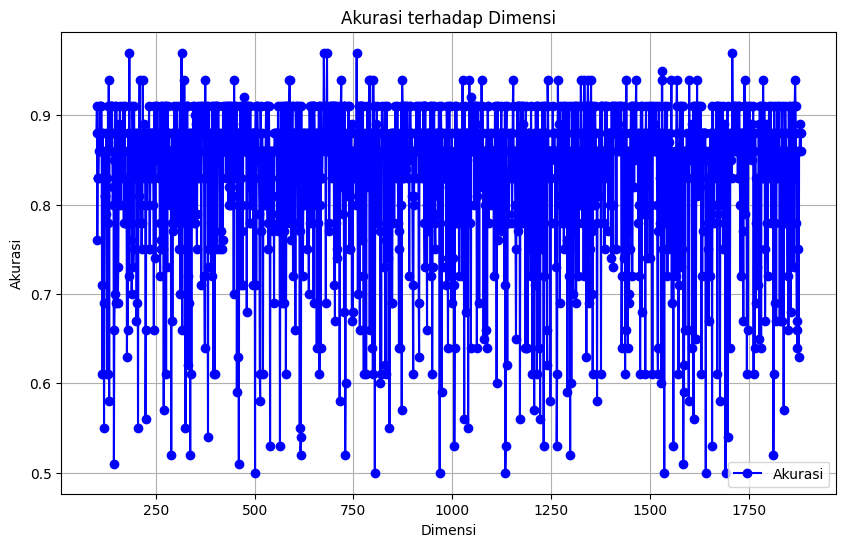

Dimensi dengan akurasi terbaik: 1708
Akurasi terbaik: 0.97


In [ ]:
accuracies = [result['accuracy'] for result in results.values()]
dimensions = list(results.keys())

plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies, marker='o', color='b', linestyle='-', label="Akurasi")
plt.xlabel('Dimensi')
plt.ylabel('Akurasi')
plt.title('Akurasi terhadap Dimensi')
plt.grid(True)
plt.legend()
plt.show()

print(f"Dimensi dengan akurasi terbaik: {best_dim}")
print(f"Akurasi terbaik: {best_accuracy:.2f}")